In [1]:
import pandas as pd
import re

# Function to remove emojis and unwanted characters
def clean_text(text):
    # Define a pattern to match emojis
    emoji_pattern = re.compile(
        "["  
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE
    )

    # Remove emojis
    text = emoji_pattern.sub(r'', text)

    # Remove special characters (keeping basic punctuation)
    text = re.sub(r'[^\w\s,.!?\'\"-]', '', text)
    
    # Optionally, you can also remove multiple spaces, newlines, and tabs
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Read the CSV file into a DataFrame
df_comments = pd.read_csv('youtubedata.csv')

# Apply the cleaning function to the 'textDisplay' column
df_comments['cleaned_textDisplay'] = df_comments['textDisplay'].apply(clean_text)

# Print the number of comments after cleaning
total_comments_cleaned = len(df_comments)
print(f'Total comments after cleaning: {total_comments_cleaned}')

# Display the first few rows of the cleaned DataFrame
print(df_comments[['textDisplay', 'cleaned_textDisplay']].head())

# Save the cleaned comments to a new CSV file
df_comments.to_csv('Cleaned_File_Name.csv', index=False)




Total comments after cleaning: 24529
                                         textDisplay  \
0  Wow wow wow the guy who made this is very geni...   
1      Youre in a johnny cab! Hell of a day idnt it!   
2  No one is using it as a bathroom yet? What hap...   
3  There's a lot of questions about how to ride o...   
4  The fact that it still has a driver's seat and...   

                                 cleaned_textDisplay  
0  Wow wow wow the guy who made this is very geni...  
1      Youre in a johnny cab! Hell of a day idnt it!  
2  No one is using it as a bathroom yet? What hap...  
3  There's a lot of questions about how to ride o...  
4  The fact that it still has a driver's seat and...  


In [2]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text
 
# Apply preprocessing to the text column
Text1 = df_comments['textDisplay'].fillna("")
Text1_preprocessed = Text1.apply(preprocess_text)

# Print the preprocessed text   
print(Text1_preprocessed)

# Save the preprocessed comments to a new CSV file
Text1_preprocessed.to_csv('Preprocessed_Comments.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        wow wow wow guy made genius unbelievable thing...
1                           youre johnny cab hell day idnt
2              one using bathroom yet happens trash inside
3        there lot question ride one really operate hap...
4          fact still driver seat steering wheel unnerving
                               ...                        
24524                                                     
24525                                                  yes
24526                                                     
24527                                                  yup
24528                                                 noce
Name: textDisplay, Length: 24529, dtype: object


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Read the preprocessed comments from the CSV file
df_preprocessed = pd.read_csv('Preprocessed_Comments.csv')

# Ensure the 'textDisplay' column is treated as strings and fill any NaN values with an empty string
df_preprocessed['textDisplay'] = df_preprocessed['textDisplay'].astype(str).fillna("")

# Apply sentiment analysis to the preprocessed text column
df_preprocessed['sentiment'] = df_preprocessed['textDisplay'].apply(get_sentiment)

# Extract compound score and categorize it as positive, negative, or neutral
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_preprocessed['sentiment_category'] = df_preprocessed['sentiment'].apply(lambda x: categorize_sentiment(x))

# Print the first few rows of the DataFrame with sentiment scores and categories
print(df_preprocessed[['textDisplay', 'sentiment', 'sentiment_category']].head())

# Save the comments with sentiment analysis to a new CSV file
df_preprocessed.to_csv('Sentiment_Comments.csv', index=False)





                                         textDisplay  \
0  wow wow wow guy made genius unbelievable thing...   
1                     youre johnny cab hell day idnt   
2        one using bathroom yet happens trash inside   
3  there lot question ride one really operate hap...   
4    fact still driver seat steering wheel unnerving   

                                           sentiment sentiment_category  
0  {'neg': 0.0, 'neu': 0.304, 'pos': 0.696, 'comp...           positive  
1  {'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'comp...           negative  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            neutral  
3  {'neg': 0.161, 'neu': 0.704, 'pos': 0.136, 'co...           negative  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            neutral  


WORD PLOT

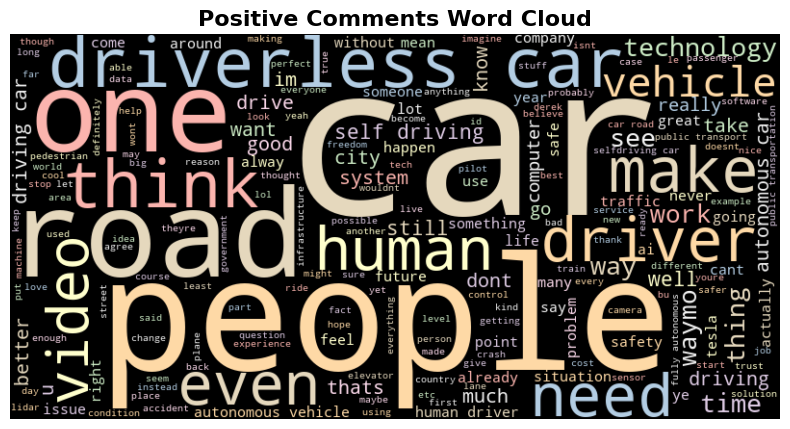

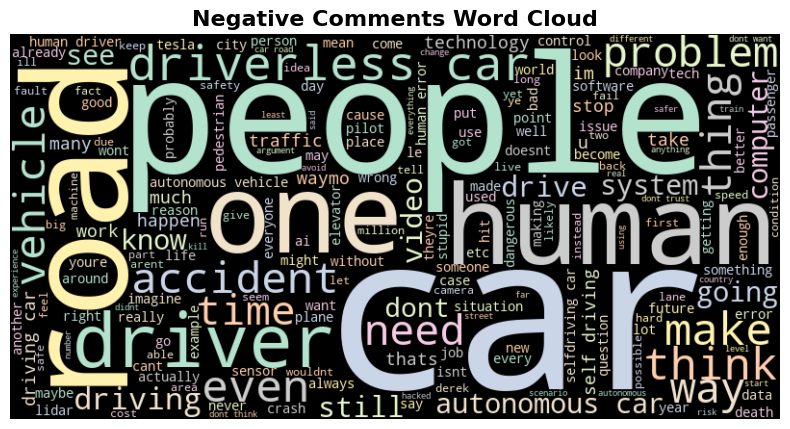

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataframe
df_preprocessed = pd.read_csv('Sentiment_Comments.csv')

# Function to generate and display a word cloud with a specific color map and dark background
def generate_word_cloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')  # Bold title
    plt.show()

# Extract text for positive and negative comments
positive_comments = ' '.join(df_preprocessed[df_preprocessed['sentiment_category'] == 'positive']['textDisplay'])
negative_comments = ' '.join(df_preprocessed[df_preprocessed['sentiment_category'] == 'negative']['textDisplay'])

# Generate and display word clouds with different color maps and dark background
generate_word_cloud(positive_comments, 'Positive Comments Word Cloud', 'Pastel1')
generate_word_cloud(negative_comments, 'Negative Comments Word Cloud', 'Pastel2')


C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2483294370.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_preprocessed, palette=custom_palette)


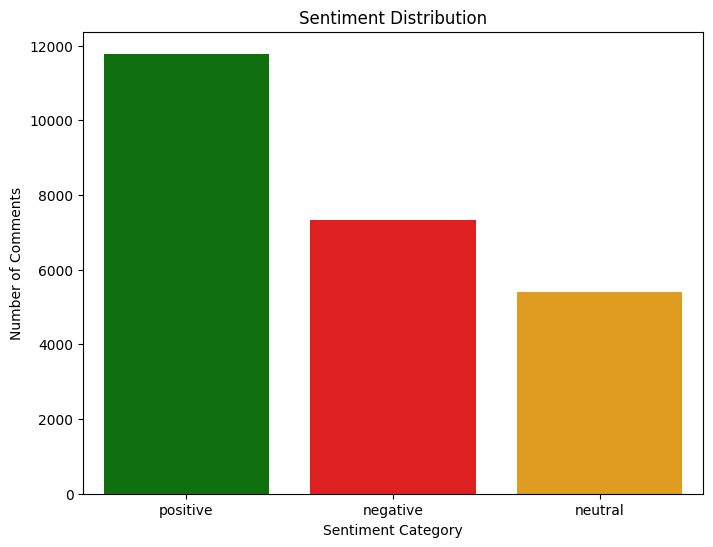

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataframe
df_preprocessed = pd.read_csv('Sentiment_Comments.csv')

# Define a custom palette
custom_palette = {'positive': 'green', 'negative': 'red', 'neutral': 'orange'}

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df_preprocessed, palette=custom_palette)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.show()


TIME SERIES 

C:\Users\usama\AppData\Local\Temp\ipykernel_24764\3926724112.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_time_series = df_original.resample('M')['sentiment_category'].value_counts().unstack().fillna(0)


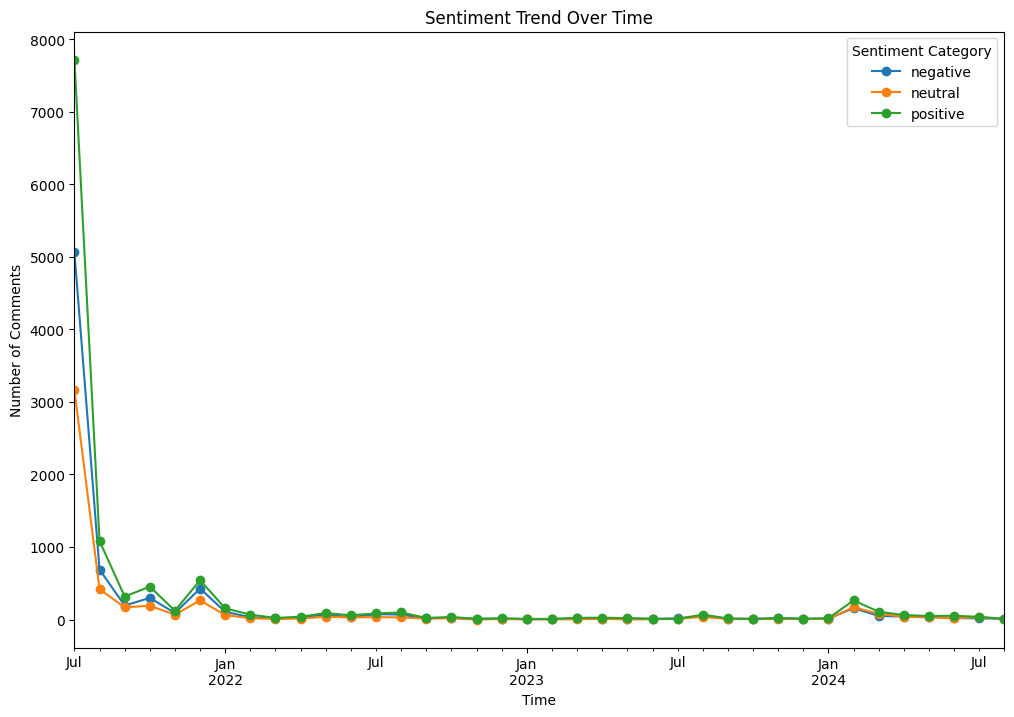

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the original comments DataFrame
df_original = pd.read_csv('youtubedata.csv')

# Convert 'publishedAt' to datetime
df_original['publishedAt'] = pd.to_datetime(df_original['publishedAt'])

# Ensure 'textDisplay' is treated as strings and fill any NaN values with an empty string
df_original['textDisplay'] = df_original['textDisplay'].astype(str).fillna("")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the original textDisplay
df_original['sentiment'] = df_original['textDisplay'].apply(get_sentiment)

# Extract compound score and categorize it as positive, negative, or neutral
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_original['sentiment_category'] = df_original['sentiment'].apply(lambda x: categorize_sentiment(x))

# Set the index to 'publishedAt' for time-series analysis
df_original.set_index('publishedAt', inplace=True)

# Resample by month and count sentiments
sentiment_time_series = df_original.resample('M')['sentiment_category'].value_counts().unstack().fillna(0)

# Plot the time series
sentiment_time_series.plot(figsize=(12, 8), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment Category')
plt.show()



Bigram and Trigram Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


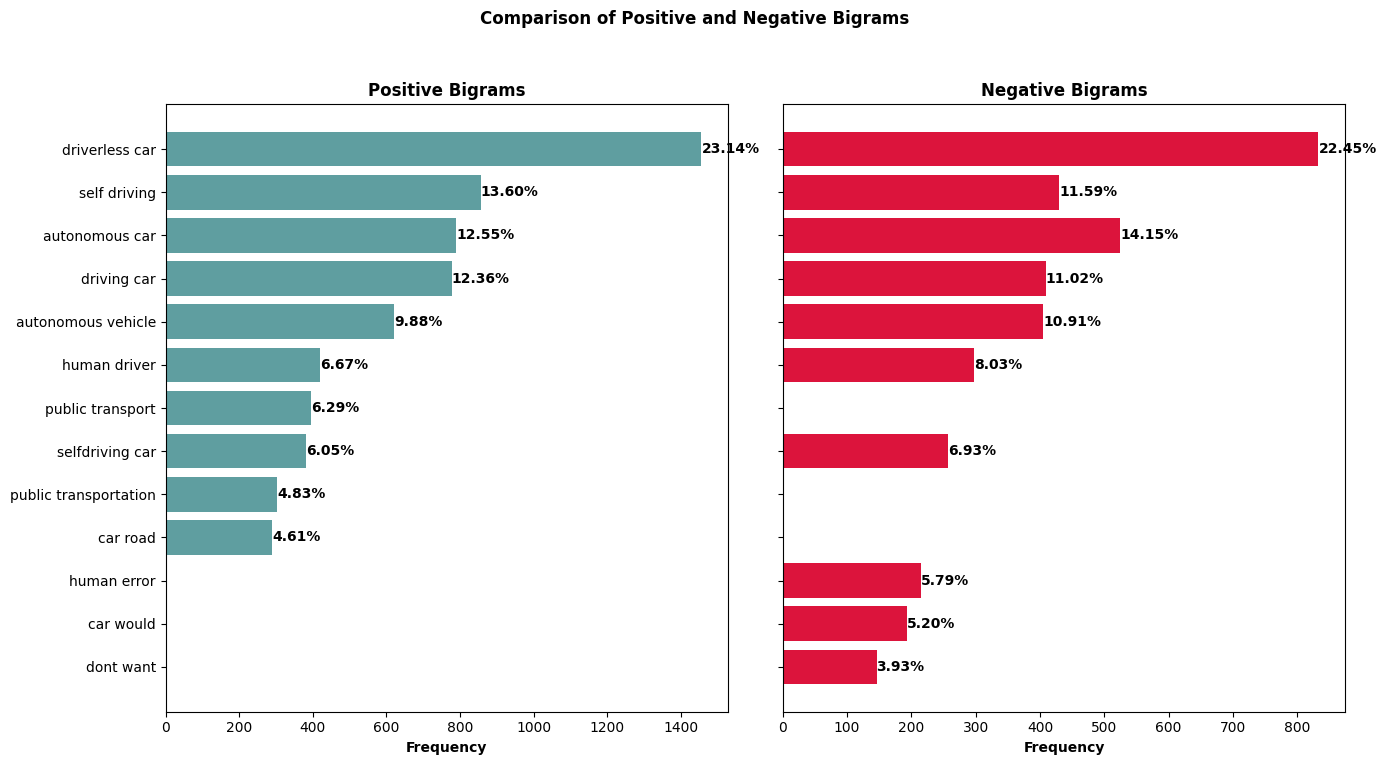

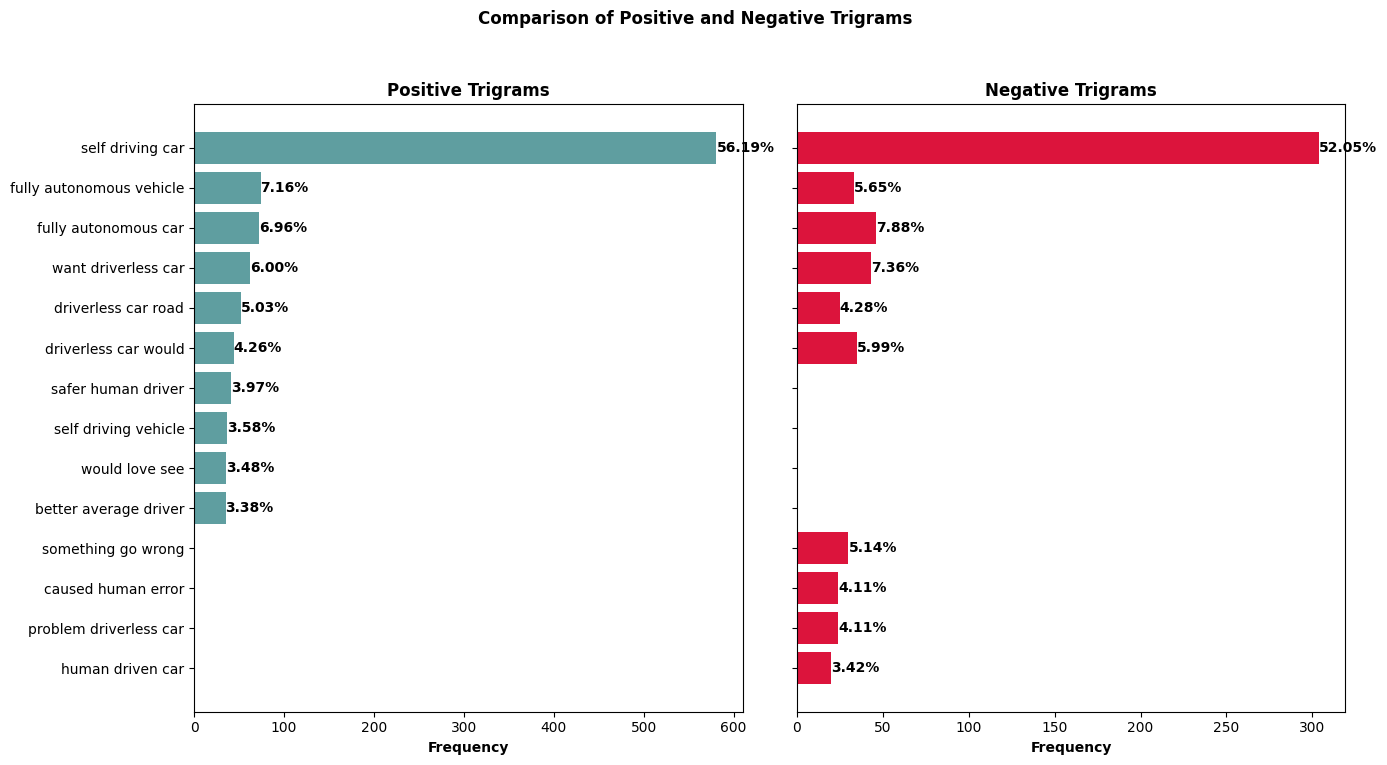

In [7]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_preprocessed = pd.read_csv('Sentiment_Comments.csv')

# Ensure necessary nltk resources are downloaded
nltk.download('punkt')

# Function to get ngrams
def get_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Filter positive and negative comments
positive_comments = df_preprocessed[df_preprocessed['sentiment_category'] == 'positive']['textDisplay']
negative_comments = df_preprocessed[df_preprocessed['sentiment_category'] == 'negative']['textDisplay']

# Combine all positive and negative comments into a single string
positive_text = ' '.join(positive_comments)
negative_text = ' '.join(negative_comments)

# Extract bigrams and trigrams for positive and negative comments
positive_bigrams = Counter(get_ngrams(positive_text, 2)).most_common(10)
negative_bigrams = Counter(get_ngrams(negative_text, 2)).most_common(10)

positive_trigrams = Counter(get_ngrams(positive_text, 3)).most_common(10)
negative_trigrams = Counter(get_ngrams(negative_text, 3)).most_common(10)

# Function to plot merged ngrams with percentages
def plot_ngrams_combined(pos_ngrams, neg_ngrams, title):
    pos_labels, pos_values = zip(*pos_ngrams)
    neg_labels, neg_values = zip(*neg_ngrams)
    
    # Calculate percentages
    pos_total = sum(pos_values)
    neg_total = sum(neg_values)
    
    pos_percentages = [f'{(value / pos_total) * 100:.2f}%' for value in pos_values]
    neg_percentages = [f'{(value / neg_total) * 100:.2f}%' for value in neg_values]

    fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
    
    # Plot positive ngrams
    bars1 = ax[0].barh(pos_labels, pos_values, color= 'cadetblue')
    ax[0].set_title('Positive ' + title, fontweight='bold')
    ax[0].set_xlabel('Frequency', fontweight='bold')
    ax[0].invert_yaxis()  # Invert y-axis for descending order

    # Add percentage labels
    for bar, percentage in zip(bars1, pos_percentages):
        width = bar.get_width()
        ax[0].text(width, bar.get_y() + bar.get_height() / 2, percentage, va='center', ha='left', fontweight='bold')

    # Plot negative ngrams
    bars2 = ax[1].barh(neg_labels, neg_values, color='crimson')
    ax[1].set_title('Negative ' + title, fontweight='bold')
    ax[1].set_xlabel('Frequency', fontweight='bold')

    # Add percentage labels
    for bar, percentage in zip(bars2, neg_percentages):
        width = bar.get_width()
        ax[1].text(width, bar.get_y() + bar.get_height() / 2, percentage, va='center', ha='left', fontweight='bold')

    plt.suptitle('Comparison of Positive and Negative ' + title, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting the combined ngrams with percentages
plot_ngrams_combined(positive_bigrams, negative_bigrams, 'Bigrams')
plot_ngrams_combined(positive_trigrams, negative_trigrams, 'Trigrams')


TOPIC MODELING

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Handle missing values in the text data
df_preprocessed['textDisplay'] = df_preprocessed['textDisplay'].fillna('')

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data = vectorizer.fit_transform(df_preprocessed['textDisplay'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_data)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Topic 0:
car human driver people vehicle accident make autonomous computer driving
Topic 1:
video waymo like derek sponsored car im na channel ad
Topic 2:
car people public dont city driverless like technology need want
Topic 3:
road tesla condition plane pilot waymo work snow like weather
Topic 4:
car driving drive driver road autonomous people like vehicle driverless


TOPIC MODELING 2


something really random for comments like what people thinks 

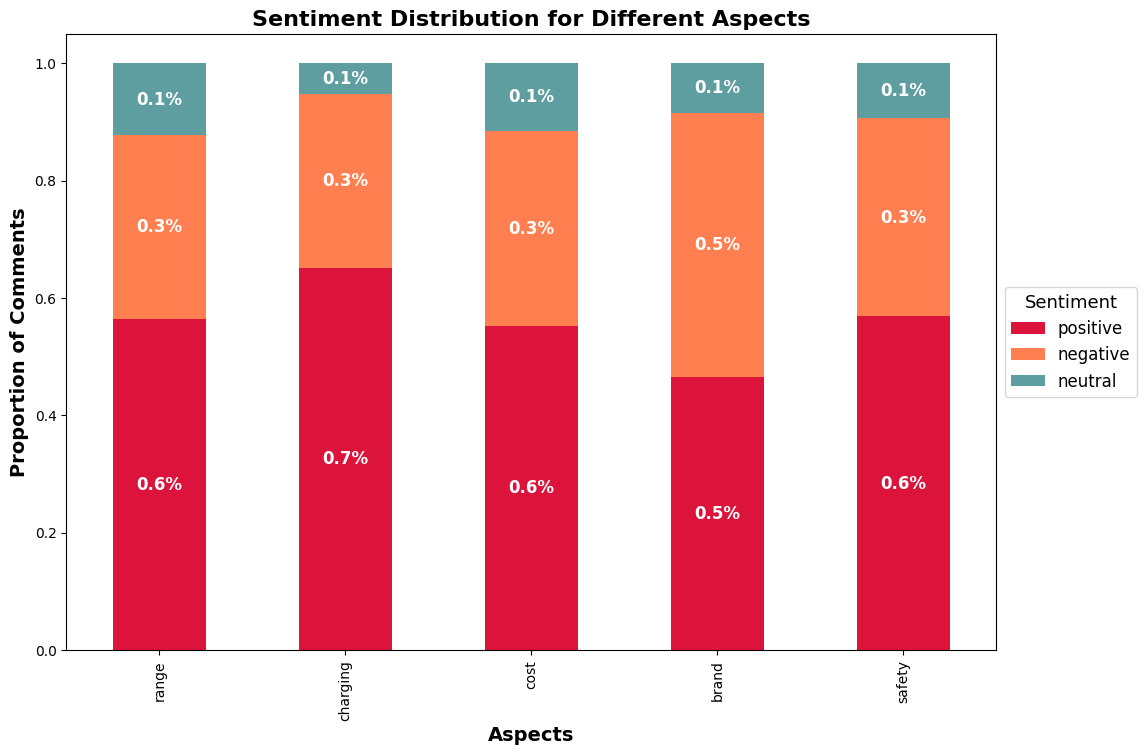

In [10]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('youtubedata.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the text column
df['sentiment'] = df['textDisplay'].apply(get_sentiment)

# Extract compound score and categorize it as positive, negative, or neutral
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(lambda x: categorize_sentiment(x))

# Define keywords for different aspects
aspects = {
    'range': ['range'],
    'charging': ['charging', 'infrastructure'],
    'cost': ['cost', 'price'],
    'brand': ['brand', 'reliability'],
    'safety': ['safety', 'self-driving', 'autonomous']
}

# Filter and analyze sentiments for each aspect
aspect_sentiments = {}
for aspect, keywords in aspects.items():
    aspect_df = df[df['textDisplay'].str.contains('|'.join(keywords), na=False)]
    aspect_sentiments[aspect] = aspect_df['sentiment_category'].value_counts(normalize=True)

# Visualize the sentiment distribution for each aspect
aspect_df = pd.DataFrame(aspect_sentiments).T
ax = aspect_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['crimson', 'coral', 'cadetblue'])

# Adding percentages on top of each bar
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f%%', color='white', fontsize=12, weight='bold')

# Customizing the plot with bold titles and labels
plt.title('Sentiment Distribution for Different Aspects', fontsize=16, fontweight='bold')
plt.xlabel('Aspects', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Comments', fontsize=14, fontweight='bold')

# Adjust the legend position to the right of the plot
plt.legend(title='Sentiment', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()





Car brands mentioned in comments:
Counter({'Waymo': 1320, 'Tesla': 852, 'Ford': 21, 'Apple': 20, 'Nissan': 5})


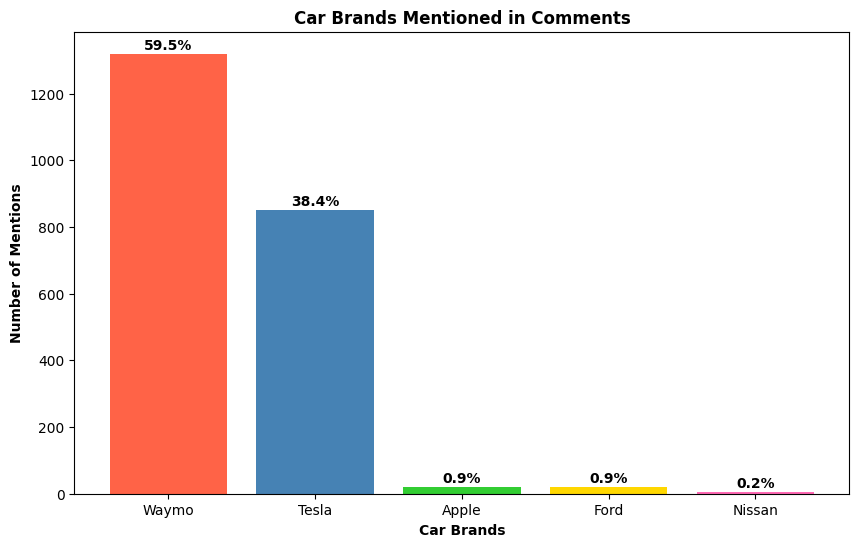

In [11]:
import pandas as pd
from collections import Counter
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('youtubedata.csv')

# Define a list of car manufacturers and models
car_brands = ['Tesla', 'Nissan', 'Ford', 'Waymo', 'Apple']

# Function to extract mentioned car brands in the comments
def extract_brands(comment, brands):
    found_brands = [brand for brand in brands if re.search(r'\b' + brand + r'\b', comment, re.IGNORECASE)]
    return found_brands

# Apply the function to the dataset
df['mentioned_brands'] = df['textDisplay'].apply(lambda x: extract_brands(str(x), car_brands))

# Get a count of mentions for each brand
brand_mentions = Counter([brand for brands in df['mentioned_brands'] for brand in brands])

# Print the results
print("Car brands mentioned in comments:")
print(brand_mentions)

# Filter out comments mentioning each brand
brand_comments = {}
for brand in car_brands:
    brand_comments[brand] = df[df['mentioned_brands'].apply(lambda x: brand in x)]

# Save the filtered comments to separate CSV files (optional)
for brand, comments in brand_comments.items():
    comments.to_csv(f"{brand}_comments.csv", index=False)

# Calculate the percentage of mentions for each brand
total_mentions = sum(brand_mentions.values())
brand_percentages = {brand: (count / total_mentions) * 100 for brand, count in brand_mentions.items()}

# Plotting the brand mentions with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(brand_mentions.keys(), brand_mentions.values(), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4'])

# Add percentages on top of the bars
for bar, percentage in zip(bars, brand_percentages.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# Adding bold title and labels
plt.xlabel('Car Brands', fontweight='bold')
plt.ylabel('Number of Mentions', fontweight='bold')
plt.title('Car Brands Mentioned in Comments', fontweight='bold')

plt.show()



C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2395452084.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['sentiment'] = comments['textDisplay'].apply(get_sentiment)
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2395452084.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['sentiment_category'] = comments['sentiment'].apply(lambda x: categorize_sentiment(x))
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2395452084.py:25: SettingWithCopyWarning: 
A value is trying to be se

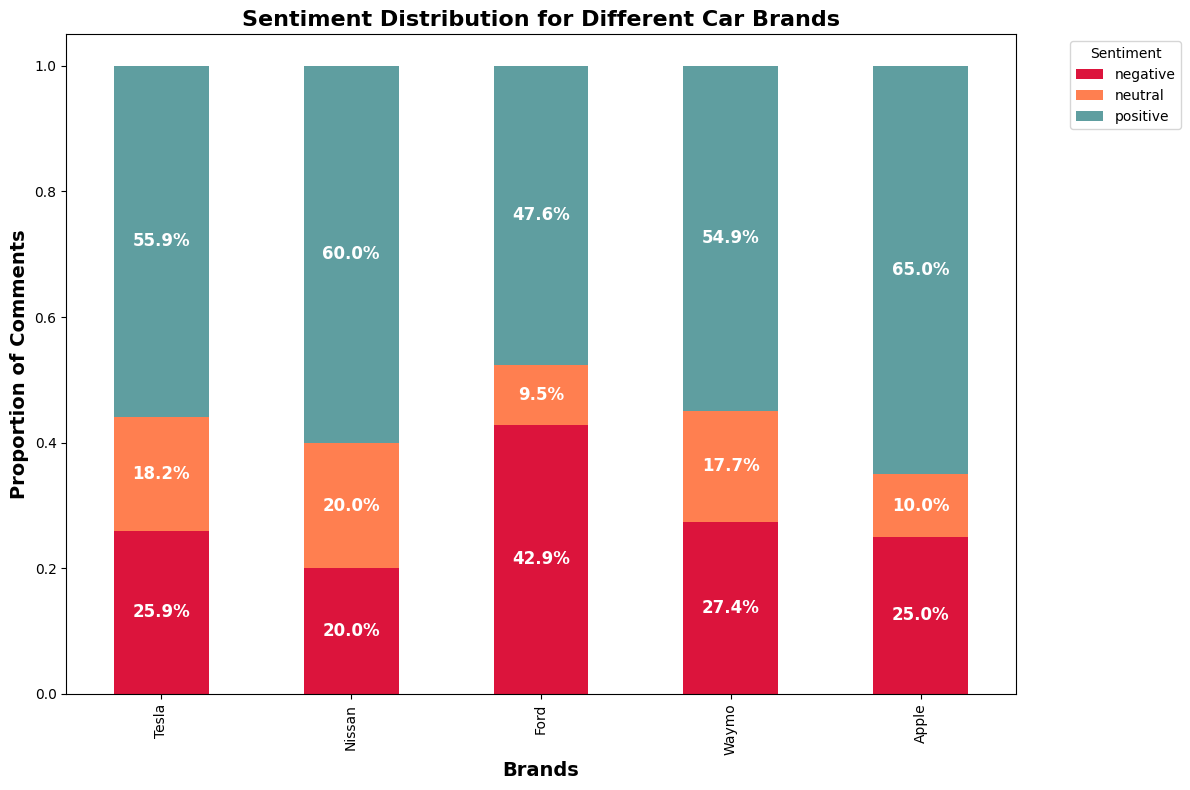

In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Function to categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Analyze sentiments for each brand
brand_sentiments = {}
for brand, comments in brand_comments.items():
    comments['sentiment'] = comments['textDisplay'].apply(get_sentiment)
    comments['sentiment_category'] = comments['sentiment'].apply(lambda x: categorize_sentiment(x))
    brand_sentiments[brand] = comments['sentiment_category'].value_counts(normalize=True)

# Convert the sentiment data to a DataFrame
brand_df = pd.DataFrame(brand_sentiments).T

# Plot with customized settings
fig, ax = plt.subplots(figsize=(12, 8))
brand_df.plot(kind='bar', stacked=True, ax=ax, color=['crimson', 'coral', 'cadetblue']) 

# Set title and labels with bold font
plt.title('Sentiment Distribution for Different Car Brands', fontsize=16, fontweight='bold')
plt.xlabel('Brands', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Comments', fontsize=14, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    percentage = f'{height * 100:.1f}%'
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Customize legend
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2716417228.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['sentiment'] = aspect_df['textDisplay'].apply(get_sentiment)
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2716417228.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['sentiment_category'] = aspect_df['sentiment'].apply(lambda x: categorize_sentiment(x))
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\2716417228.py:50: SettingWithCopyWarning: 
A value is trying to b

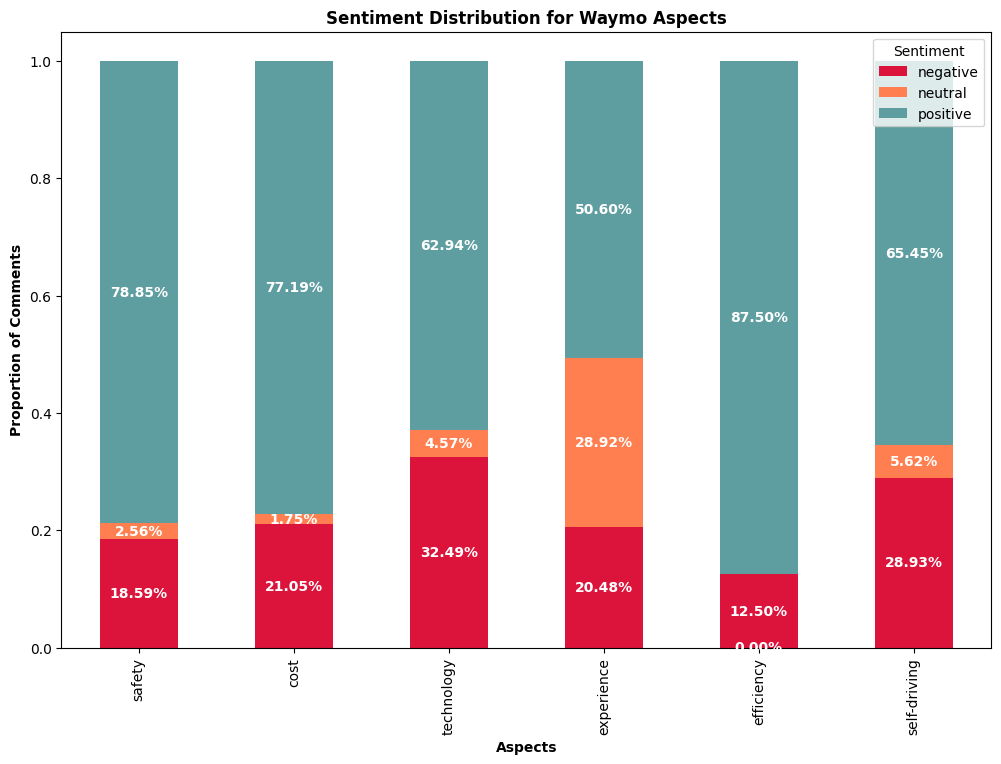

In [13]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Function to categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# List of car brands to analyze
car_brands = ['Tesla', 'Ford', 'Nissan', 'Apple', 'Waymo']

# Filter out comments mentioning each brand
brand_comments = {}
for brand in car_brands:
    brand_comments[brand] = df[df['textDisplay'].str.contains(brand, case=False, na=False)]

# Check if 'Waymo' comments are filtered correctly
if 'Waymo' in brand_comments and not brand_comments['Waymo'].empty:
    waymo_comments = brand_comments['Waymo']

    # Define keywords for aspects related to Waymo cars
    waymo_aspects = {
        'safety': ['safety', 'safe', 'security'],
        'cost': ['cost', 'price'],
        'technology': ['technology', 'tech'],
        'experience': ['experience', 'comfort'],
        'efficiency': ['efficiency', 'performance'],
        'self-driving': ['self-driving', 'autonomous', 'driverless']
    }

    # Filter and analyze sentiments for each aspect related to Waymo
    waymo_aspect_sentiments = {}
    for aspect, keywords in waymo_aspects.items():
        aspect_df = waymo_comments[waymo_comments['textDisplay'].str.contains('|'.join(keywords), case=False, na=False)]
        aspect_df['sentiment'] = aspect_df['textDisplay'].apply(get_sentiment)
        aspect_df['sentiment_category'] = aspect_df['sentiment'].apply(lambda x: categorize_sentiment(x))
        waymo_aspect_sentiments[aspect] = aspect_df['sentiment_category'].value_counts(normalize=True)

    # Visualize the sentiment distribution for each aspect related to Waymo
    waymo_aspect_df = pd.DataFrame(waymo_aspect_sentiments).T
    ax = waymo_aspect_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['crimson', 'coral', 'cadetblue'])  # Correct color assignment
    
    # Add percentages on the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.text(x + width / 2, y + height / 2, f'{height * 100:.2f}%', ha='center', va='center', fontweight='bold', color ='white')

    plt.title('Sentiment Distribution for Waymo Aspects', fontweight='bold')
    plt.xlabel('Aspects', fontweight='bold')
    plt.ylabel('Proportion of Comments', fontweight='bold')
    plt.legend(title='Sentiment')
    plt.show()
else:
    print("No comments found for Waymo.")



CONFUSION MATRIX


Unique labels in y_test: ['positive' 'negative']


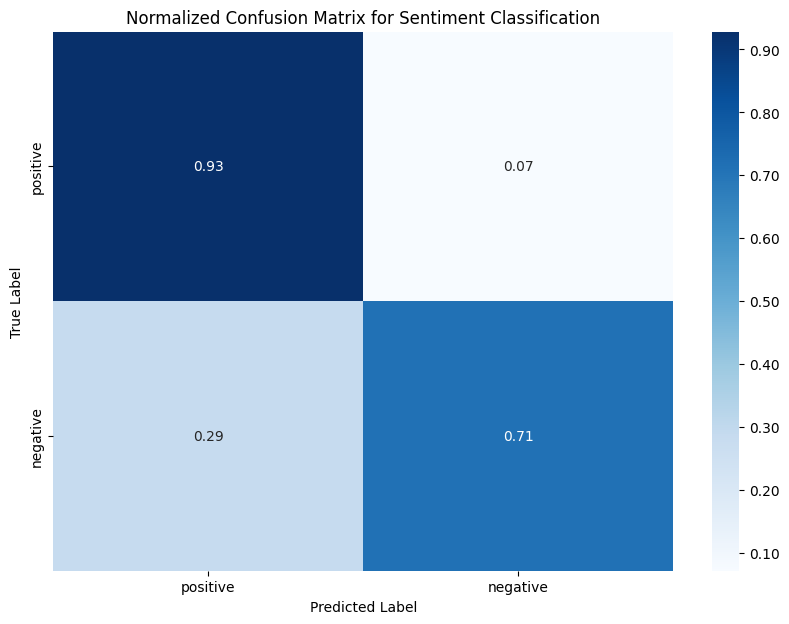

Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.71      0.78      1527
    negative       0.83      0.93      0.88      2298

    accuracy                           0.84      3825
   macro avg       0.85      0.82      0.83      3825
weighted avg       0.85      0.84      0.84      3825



In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
# Make sure your dataset contains 'textDisplay' and 'sentiment_category'
# df = pd.read_csv('your_dataset.csv')

# Remove neutral rows
df_preprocessed = df_preprocessed[df_preprocessed['sentiment_category'] != 'neutral']

# Drop any rows with NaN values
df_preprocessed.dropna(subset=['textDisplay', 'sentiment_category'], inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['textDisplay'], df_preprocessed['sentiment_category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vec, y_train)

# Predict the sentiments
y_pred = classifier.predict(X_test_vec)

# Inspect unique values in y_test
unique_labels = y_test.unique()
print(f"Unique labels in y_test: {unique_labels}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)

# Normalize the confusion matrix to get the distribution percentiles
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized_df = pd.DataFrame(cm_normalized, index=unique_labels, columns=unique_labels)

# Plot the normalized confusion matrix with float formatting
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'format': '%.2f'})
plt.title('Normalized Confusion Matrix for Sentiment Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Convert unique_labels to a list of strings for classification_report
unique_labels_str = unique_labels.astype(str).tolist()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=unique_labels_str)
print('Classification Report:')
print(report)


C:\Users\usama\AppData\Local\Temp\ipykernel_24764\4195751084.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['sentiment'] = aspect_df['textDisplay'].apply(get_sentiment)
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\4195751084.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['sentiment_category'] = aspect_df['sentiment'].apply(lambda x: categorize_sentiment(x))
C:\Users\usama\AppData\Local\Temp\ipykernel_24764\4195751084.py:43: SettingWithCopyWarning: 
A value is trying to b

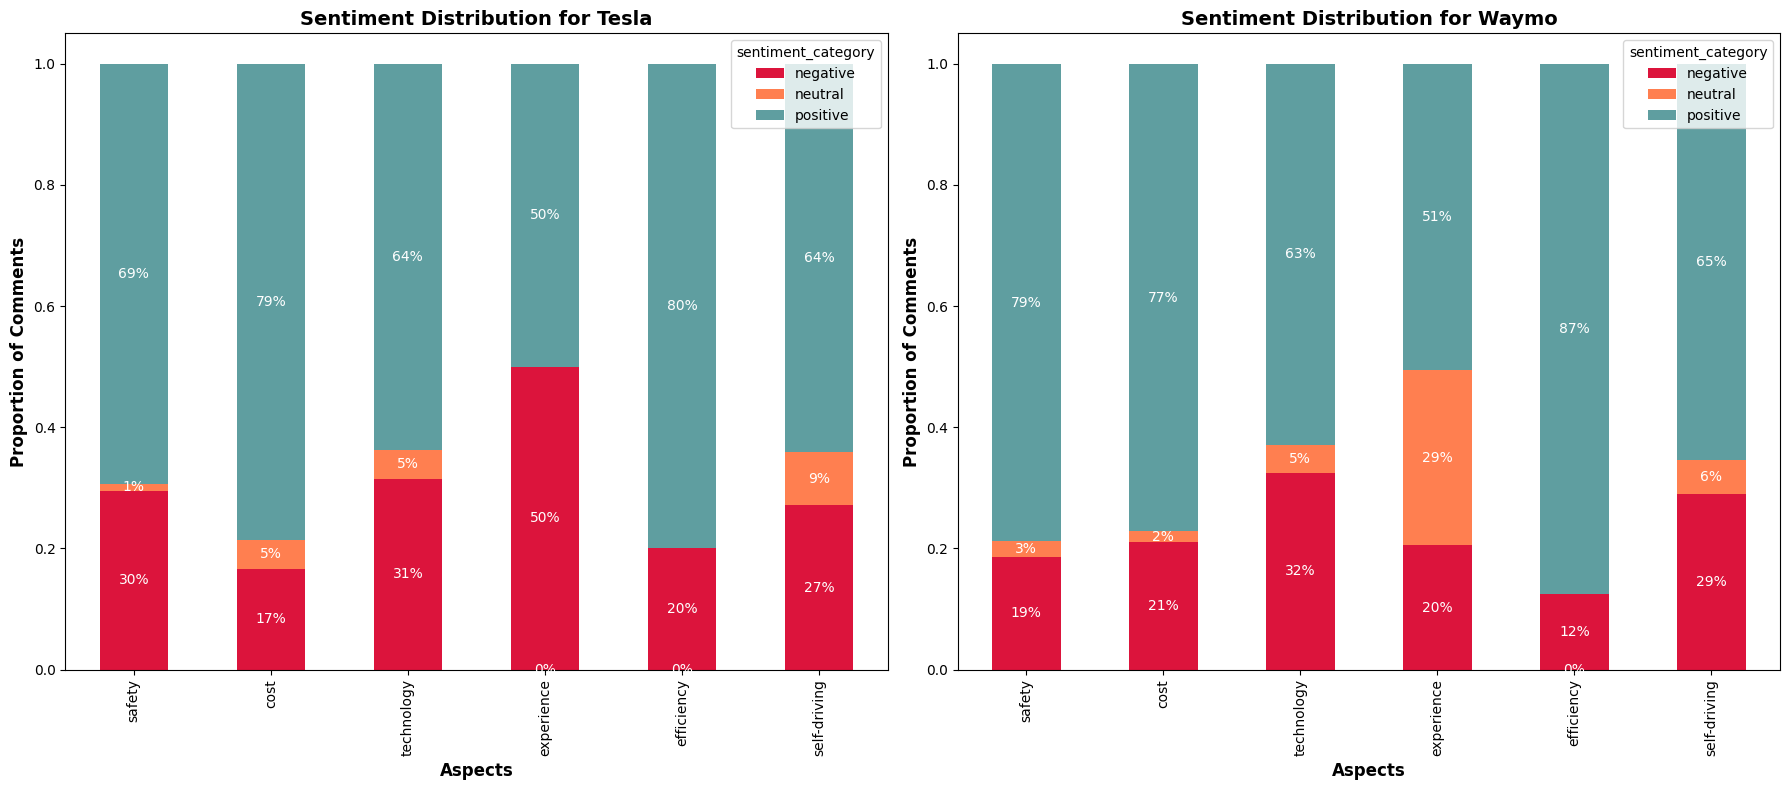

In [15]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Function to categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# List of aspects to analyze
aspects = {
    'safety': ['safety', 'safe', 'security'],
    'cost': ['cost', 'price'],
    'technology': ['technology', 'tech'],
    'experience': ['experience', 'comfort'],
    'efficiency': ['efficiency', 'performance'],
    'self-driving': ['self-driving', 'autonomous', 'driverless']
}

# Filter comments for Tesla and Waymo
tesla_comments = df[df['textDisplay'].str.contains('Tesla', case=False, na=False)]
waymo_comments = df[df['textDisplay'].str.contains('Waymo', case=False, na=False)]

# Analyze sentiments for each aspect for Tesla and Waymo
comparison_sentiments = {'Tesla': {}, 'Waymo': {}}

for aspect, keywords in aspects.items():
    for brand, comments in zip(['Tesla', 'Waymo'], [tesla_comments, waymo_comments]):
        aspect_df = comments[comments['textDisplay'].str.contains('|'.join(keywords), case=False, na=False)]
        aspect_df['sentiment'] = aspect_df['textDisplay'].apply(get_sentiment)
        aspect_df['sentiment_category'] = aspect_df['sentiment'].apply(lambda x: categorize_sentiment(x))
        comparison_sentiments[brand][aspect] = aspect_df['sentiment_category'].value_counts(normalize=True)

# Convert to DataFrame for visualization
tesla_df = pd.DataFrame(comparison_sentiments['Tesla']).T
waymo_df = pd.DataFrame(comparison_sentiments['Waymo']).T

# Plotting the Tesla chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

tesla_df.plot(kind='bar', stacked=True, ax=axes[0], color=['crimson', 'coral', 'cadetblue'])
axes[0].set_title('Sentiment Distribution for Tesla', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Aspects', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Proportion of Comments', fontsize=12, fontweight='bold')

# Adding percentages to Tesla chart
for p in axes[0].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axes[0].text(x + width / 2, y + height / 2,
                 '{:.0f}%'.format(height * 100),
                 ha='center', va='center', fontsize=10, color='white')

# Plotting the Waymo chart
waymo_df.plot(kind='bar', stacked=True, ax=axes[1], color=['crimson', 'coral', 'cadetblue'])
axes[1].set_title('Sentiment Distribution for Waymo', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Aspects', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Proportion of Comments', fontsize=12, fontweight='bold')

# Adding percentages to Waymo chart
for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axes[1].text(x + width / 2, y + height / 2,
                 '{:.0f}%'.format(height * 100),
                 ha='center', va='center', fontsize=10, color='white')

# Adjust layout
plt.tight_layout()
plt.show()
